In [1]:
import scipy.io.wavfile as wv
import os
from matplotlib import pyplot as plt
import numpy as np
import scipy.fftpack as fftp
import pandas as pd
from shutil import copy
import scipy.signal as ss

In [2]:
#function for separ first number from filename
def separ_number_from_filename(filename_string):
    for i in range(len(filename_string)):
        if not filename_string[i].isdigit():
            pos = i
            break
    return str(int(filename_string[:pos])) 

#defines where signal starts to differ from noise, by treashold. Goes along the signal with tapper
def start_end_definer (spectrogr,tr):
    mean_spectrogr = spectrogr.mean(axis=0)
    start =0                          # put the beginning and the end of file as initial values
    end = len(mean_spectrogr)-1       # in case, np.where won't wind anything
    sig = np.where(mean_spectrogr>mean_spectrogr.std()*tr)
    if (sig[0][0]):
        start = sig[0][0]
    if (sig[0][-1]):
        end = sig[0][-1]
    return (start, end)   #in dots, not seconds

def low_pass_filt(data, sample_rate, f_cutoff):
    Wn = f_cutoff / (sample_rate/2)
    b, a = ss.iirfilter(1, Wn, ftype='butter', btype='low')
    return ss.filtfilt(b, a, data) #filtering

def high_pass_filt(data, sample_rate, f_cutoff):
    Wn = f_cutoff / (sample_rate/2)
    b, a = ss.iirfilter(1, Wn, ftype='butter', btype='high')
    return ss.filtfilt(b, a, data) #filtering

def resampling_2D (np_array_2D, new_width):
    (fr_points, time_points) = np_array_2D.shape
    new_2d_np_array = np.zeros((fr_points, new_width))
    for i in range(fr_points):
        new_2d_np_array[i,:] = ss.resample(np_array_2D[i,:], new_width)
    return new_2d_np_array
    


0 file=  03_35b46170b8.wav
1 file=  03_46c79029ac.wav
2

C:\Users\Vira\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


 file=  04_a370c8b485.wav
3 file=  04_a4191b2c97.wav
4 file=  05_a8a50a4982.wav
5 file=  05_a98b16575b.wav
6 file=  06_ac23855339.wav
7 file=  06_b13287bb23.wav
8 file=  07_8785441462.wav
9 file=  08_15bc600816.wav
10 file=  08_17b97c58ab.wav
11 file=  08_9c059aba70.wav
12 file=  09_707c365603.wav
13 file=  09_788b1b581a.wav
14 file=  09_841b9ca706.wav
15 file=  10_5499970c46.wav
16 file=  10_56640025a8.wav


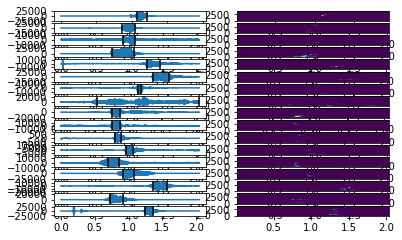

In [18]:
#creating Pandas with 'Filename', 'Signal_start', 'Signal_end','y_number' for each file, plottint signal and power spec
path = 'C:\\Users\\verat\\Desktop\\SpeechRecognition\\samples_Xsmall\\'
path = 'C:\\Users\\Vira\\Desktop\\DataScienceMeetUp\\SpeechRecognition\\samples_Xsmall\\'
filelist = os.listdir(path)
N_samples = len(filelist) #how many wav files
for file in filelist:
    if not ('.wav' in file):
        filelist.remove(file)
win_num = len(filelist)+1
pd_Parameters = pd.DataFrame(columns = ['Filename', 'Signal_start', 'Signal_end','Signal_ampl','y_number',
                                        'resam_Signal','resam_Spectr'])

pd_Parameters['Filename']=filelist
for i in range(N_samples):

    file = filelist[i]
    print (i, 'file= ', file)
    speech_num = separ_number_from_filename(file)
    pd_Parameters.at[i,'y_number']=speech_num
    SampleRate,data = wv.read(path+file)
    if len(data.shape)==1:
        signal_ampl = data[:]
    else:
        signal_ampl = data[:,0]
    time = np.linspace(0, len(signal_ampl)/SampleRate, len(signal_ampl))
    
    plt.subplot(win_num,2,i*2+1)
    plt.plot(time,signal_ampl)
    plt.tight_layout()
    signal_ampl_HP = high_pass_filt(signal_ampl, SampleRate, 500)
    f, t, Sxx = ss.spectrogram(signal_ampl_HP, fs = SampleRate, nperseg=128)
    (start_p, end_p) = start_end_definer(Sxx,0.8) #in dots
    start_s = t[start_p]
    end_s= t[end_p]
    pd_Parameters.at[i,'Signal_start']=start_s
    pd_Parameters.at[i,'Signal_end']=end_s
    plt.axvline(start_s, color='k')
    plt.axvline(end_s, color='k')
    
    plt.subplot(win_num,2,i*2+2)
    plt.pcolormesh(t, f, Sxx)
    
    #sign= signal_ampl[int(start_s*SampleRate):int(end_s*SampleRate)]
    #pd_Parameters.at[i,'Signal_ampl']=np.max(sign)-np.min(sign)
    #pd_Parameters.at[i,'resam_Signal']= ss.resample(sign/max(sign),1000) #nomalized and resampled signal
    #pd_Parameters.at[i,'resam_Spectr']= resampling_2D (Sxx[start_p:end_p,:], new_width=20) #nomalized and resampled signal
pd_Parameters['Duration']=pd_Parameters['Signal_end']-pd_Parameters['Signal_start']
pd_Parameters.to_csv('pd_Parameters.csv')

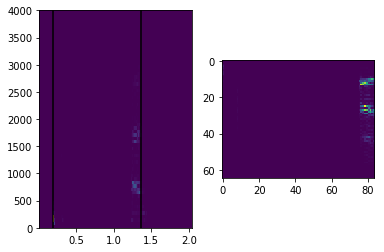

In [19]:
plt.subplot (1,2,1)
f, t, Sxx = ss.spectrogram(signal_ampl, fs = SampleRate, nperseg=128)
plt.pcolormesh(t, f, Sxx)  
(start_p, end_p) = start_end_definer(Sxx,0.8) #in dots
start_s = t[start_p]
end_s= t[end_p]
plt.axvline(start_s, color='k')
plt.axvline(end_s, color='k')

plt.subplot (1,2,2)
f, t, Sxx = ss.spectrogram(signal_ampl_HP, fs = SampleRate, nperseg=128)
np_array_2D=Sxx
new_width=20
new_arr = np.zeros((Sxx.shape[0],(end_p-start_p)))
#start_p, end_p
for i in range (65):
    new_arr[i][:]=Sxx[i][start_p:end_p]    
plt.imshow(new_arr)

In [17]:
end_p

97